In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

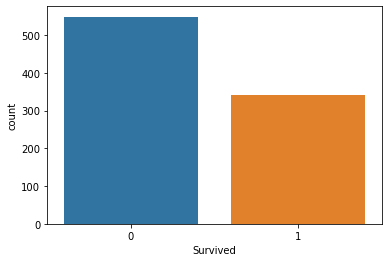

In [7]:
sns.countplot(x='Survived',data=df)

In [8]:
df['Survived'].value_counts()
#342 people survived

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

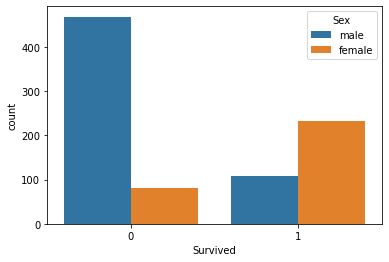

In [9]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [10]:
#df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mode().sort_values(by='Survived', ascending=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

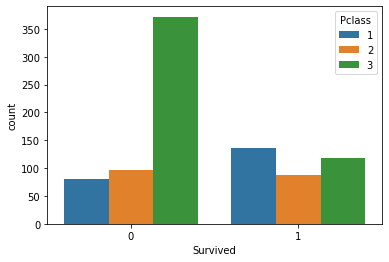

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

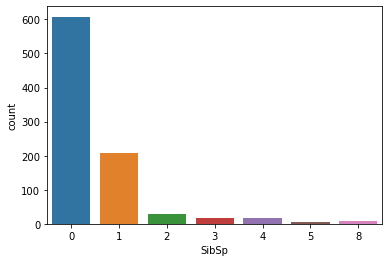

In [12]:
sns.countplot(x="SibSp",data=df)

## Data Wrangling

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#sns.heatmap(df,cmap="tab20")

<AxesSubplot:xlabel='Parch', ylabel='Age'>

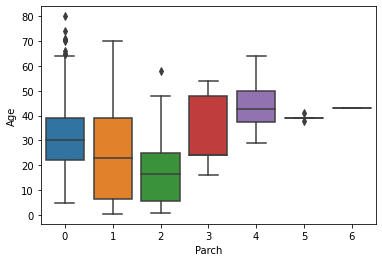

In [15]:
sns.boxplot(x='Parch',y='Age',data=df)

In [16]:
df.drop("Cabin",axis=1,inplace=True)

In [17]:
#Approach1:Dropping missing values
df.dropna(inplace=True)

<AxesSubplot:>

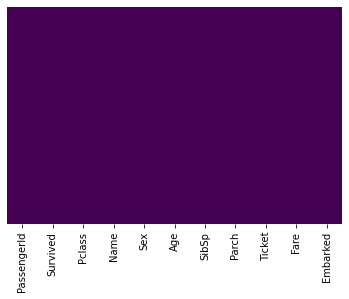

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df['Age']=df['Age'].replace(to_replace=0, value=np.nan)
df['Age']=df['Age'].astype(float)
mean=df['Age'].mean()
df['Age'].replace(np.nan,mean,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [21]:
df=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [23]:
dummies=pd.get_dummies(df[['Sex','Embarked','Pclass']],columns=['Sex','Embarked','Pclass'],drop_first=True)

In [24]:
df=pd.concat([df,dummies],axis=1)

In [25]:
columns=['Sex','Embarked','Pclass']

In [26]:
df.drop(columns,axis=1,inplace=True)

In [27]:
df.head()

,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [29]:
lowage,uppage=remove_outlier(df['Age'])
df["Age"]=np.where(df['Age']>uppage,uppage,df['Age'])
df["Age"]=np.where(df['Age']<lowage,lowage,df['Age'])

In [30]:
lowage,uppage=remove_outlier(df['SibSp'])
df["SibSp"]=np.where(df['SibSp']>uppage,uppage,df['SibSp'])
df["SibSp"]=np.where(df['SibSp']<lowage,lowage,df['SibSp'])

In [31]:
lowage,uppage=remove_outlier(df['Parch'])
df["Parch"]=np.where(df['Parch']>uppage,uppage,df['Parch'])
df["Parch"]=np.where(df['Parch']<lowage,lowage,df['Parch'])

In [32]:
lowage,uppage=remove_outlier(df['Parch'])
df["Pclass_2"]=np.where(df['Pclass_2']>uppage,uppage,df['Pclass_2'])
df["Pclass_2"]=np.where(df['Pclass_2']<lowage,lowage,df['Pclass_2'])

<AxesSubplot:xlabel='Parch', ylabel='Age'>

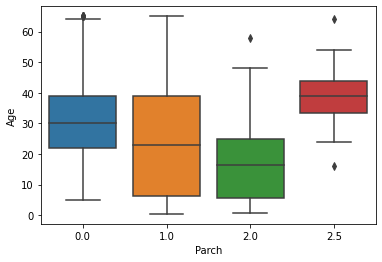

In [33]:
sns.boxplot(x='Parch',y='Age',data=df)

In [34]:
x=df.drop(['Survived'],axis=1)
y=df[['Survived']]

In [35]:
reg=LogisticRegression()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [37]:
reg.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
reg.score(x_train,y_train)

0.8052208835341366

In [39]:
reg.score(x_test,y_test)

0.7897196261682243

In [40]:
df['Age']=df['Age'].replace(to_replace=0, value=np.nan)
df['Age']=df['Age'].astype(float)
median=df['Age'].median()
df['Age'].replace(np.nan,median,inplace=True)

In [41]:
df.sample()

,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
851,0,65.0,0.0,0.0,1,0,1,0.0,1


In [42]:
reg.score(x_train,y_train)

0.8052208835341366

In [43]:
reg.score(x_test,y_test)

0.7897196261682243

In [44]:
from sklearn import metrics

In [45]:
predictions=reg.predict(x_test)

In [46]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       126
           1       0.75      0.74      0.74        88

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[104,  22],
       [ 23,  65]], dtype=int64)

<AxesSubplot:>

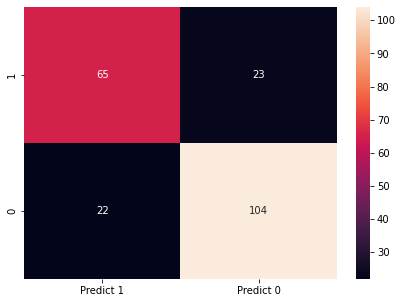

In [48]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [50]:
xscaled=x.apply(zscore)
xscaled.describe()

,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,2.311665e-16,5.301627e-16,-4.677906e-18,5.083325e-17,-4.740278e-17,7.921254e-17,1.425202e-16,-1.668453e-16
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-2.041367e+00,-6.352756e-01,-5.577492e-01,-1.322511e+00,-2.023257e-01,-1.872519e+00,-5.665375e-01,-9.971949e-01
25%,-6.701073e-01,-6.352756e-01,-5.577492e-01,-1.322511e+00,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
50%,-1.098378e-01,-6.352756e-01,-5.577492e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
75%,5.904991e-01,7.760075e-01,8.430177e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,1.002813e+00
max,2.481409e+00,2.892932e+00,2.944168e+00,7.561375e-01,4.942527e+00,5.340398e-01,1.765108e+00,1.002813e+00


In [51]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=1)

In [52]:
NNH=KNeighborsClassifier(n_neighbors=29)

In [53]:
NNH.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=29)

In [54]:

NNH.score(x_train,y_train)

0.8012048192771084

In [55]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.7897196261682243

In [56]:
from sklearn.naive_bayes import GaussianNB
naiv_model=GaussianNB()
naiv_model.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [57]:
naiv_model.score(x_train,y_train)

0.7670682730923695

In [58]:
naiv_model.score(x_test,y_test)

0.7757009345794392

In [59]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [60]:
svc_model.score(x_train,y_train)

0.8433734939759037

In [61]:
svc_model.score(x_test,y_test)

0.8130841121495327

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree=DecisionTreeClassifier()

In [64]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
dtree.score(x_train,y_train)

0.9578313253012049

In [66]:
dtree.score(x_test,y_test)

0.7429906542056075

In [67]:
dtree1=DecisionTreeClassifier(max_depth=4,criterion='entropy')

In [68]:
dtree1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [69]:
dtree1.score(x_train,y_train)

0.8373493975903614

In [70]:
dtree1.score(x_test,y_test)

0.7897196261682243

In [71]:
from sklearn.ensemble import BaggingClassifier

In [72]:
model=BaggingClassifier(n_estimators=200,base_estimator=dtree1)

In [73]:
model.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4),
                  n_estimators=200)

In [74]:
model.score(x_train,y_train)

0.8393574297188755

In [75]:
model.score(x_test,y_test)

0.8177570093457944

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
model=AdaBoostClassifier(n_estimators=11,base_estimator=dtree1,learning_rate=0.6)

In [78]:
model.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=4),
                   learning_rate=0.6, n_estimators=11)

In [79]:
model.score(x_train,y_train)

0.9176706827309237

In [80]:
model.score(x_test,y_test)

0.7476635514018691

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
model=GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100)

In [83]:
model.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [84]:
model.score(x_train,y_train)

0.8995983935742972

In [85]:
model.score(x_test,y_test)

0.7897196261682243

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=5,max_features=4,min_samples_split=6)

In [88]:
model.fit(x_train,y_train)

C:\Users\MURALI~1\AppData\Local\Temp/ipykernel_5652/1002171229.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=4,
                       min_samples_split=6, n_estimators=200)

In [89]:
model.score(x_train,y_train)

0.8514056224899599

In [90]:
model.score(x_test,y_test)

0.7897196261682243

In [91]:
import xgboost as xgb

In [92]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [93]:
from xgboost import XGBClassifier

In [94]:
model=XGBClassifier(n_estimators=15,max_depth=7,learning_rate=0.1)

In [95]:
model.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

[14:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
model.score(x_train,y_train)

0.8714859437751004

In [97]:
model.score(x_test,y_test)

0.7710280373831776

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [99]:
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

#generate two class dataset
#x,y=make_classification(n_samples=10000,n_classes=2,n_features=20,random_state=127)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=127)

#train the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#LogisticRegression
model1=LogisticRegression()
#Gausian
model2=GaussianNB()

#fit the model
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

#predict the probabilities
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)

from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)


0.8428764044943821 0.8107865168539325


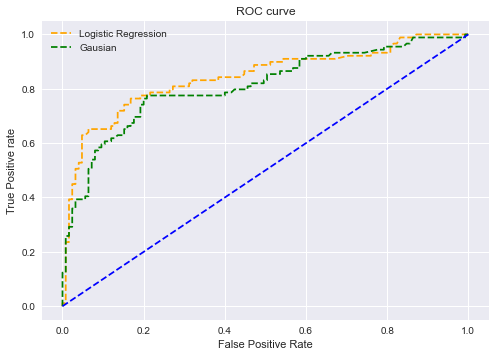

In [100]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Gausian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [101]:
#from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

#generate two class dataset
#x,y=make_classification(n_samples=10000,n_classes=2,n_features=20,random_state=127)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=127)

#Gaussian
model1=KNeighborsClassifier(n_neighbors=11)
#SVC
model2=SVC(probability=True)

#fit the model
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

#predict the probabilities
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)

from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)


0.780314606741573 0.7379325842696629


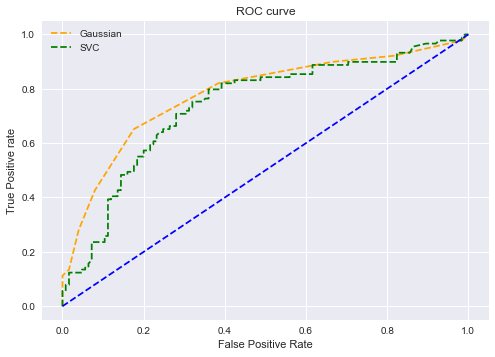

In [102]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [103]:
#from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

#generate two class dataset
#x,y=make_classification(n_samples=10000,n_classes=2,n_features=20,random_state=127)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=127)

#adaboost
model1=AdaBoostClassifier()
#XGB
model2=XGBClassifier()

#fit the model
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

#predict the probabilities
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)

from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)


[14:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8459775280898877 0.8600449438202247


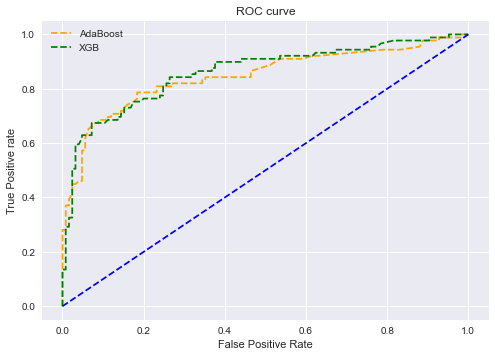

In [104]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AdaBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [105]:
#from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

#generate two class dataset
#x,y=make_classification(n_samples=10000,n_classes=2,n_features=20,random_state=127)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=127)

#randomforest
model1=RandomForestClassifier()
#gradentboosting
model2=GradientBoostingClassifier()

#fit the model
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

#predict the probabilities
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)

from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)


0.8502471910112359 0.8764044943820225


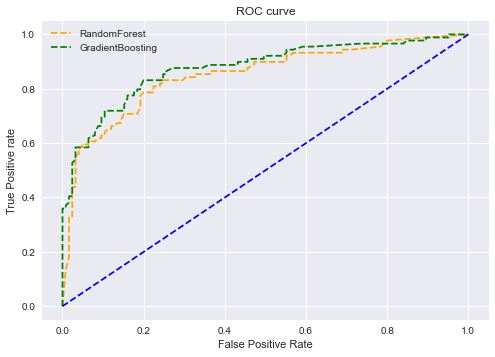

In [106]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='GradientBoosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [107]:
#from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

#generate two class dataset
#x,y=make_classification(n_samples=10000,n_classes=2,n_features=20,random_state=127)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=127)

#bagging
model1=BaggingClassifier()
#Decisiontree
model2=DecisionTreeClassifier()

#fit the model
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

#predict the probabilities
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)

from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)


0.8687640449438203 0.7764044943820224


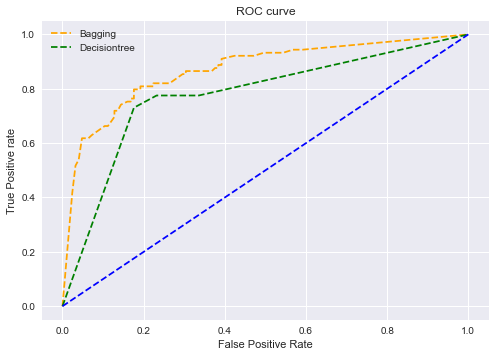

In [108]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Bagging')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decisiontree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
